# Support Vector Machine

### Loading and Visualizing Data 

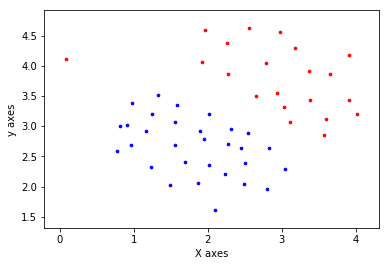

In [349]:
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
data = sio.loadmat('ex6data1.mat')
X = data['X']
y = data['y']

x_min = X[:,0].min() - 0.1
x_max = X[:,0].max() + 0.1
y_min = X[:,1].min() - 0.1
y_max = X[:,1].max() + 0.1

#Plots the data points X and y into a new figure 
def plotDataClassification(X, y):
    for index,val in enumerate(y):
        if y[index] == 0:
            plt.scatter(X[index, 0], X[index, 1], color='blue', s=7)
        else:
            plt.scatter(X[index, 0], X[index, 1], color='red', s=7)
    
    tolerance = 0.3
    plt.axis([min(X[:, 0]) - tolerance, max(X[:, 0]) + tolerance, min(X[:, 1]) - tolerance, max(X[:, 1]) + tolerance])        
    plt.xlabel('X axes')
    plt.ylabel('y axes')
    
    
plotDataClassification(X, y)


### Train a linear SVM on the dataset and plot the decision boundary learned

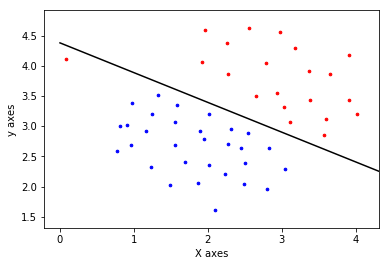

In [350]:
#training
C=10
clf = svm.SVC(kernel='linear', C=C)
clf.fit(X, y.ravel())

#evaluate accuracy
accuracy = clf.score(X, y)

#make new prediction
prediction = clf.predict([[5.9643, 10.5957]])

#plot decision boundary
def plot_linear_boundary(clf):
    # w in this case is a <2,1> vector containing theta1 and theta2, the optimized coefficients related to x1 and x2
    w = clf.coef_[0]

    # line slope
    a = -w[0] / w[1]

    # generating an x grid
    xx = np.linspace(0,12)

    # calculating the decision boundary function on the x grid
    # clf.intercept_[0] is actually equal to theta0
    yy = a * xx - clf.intercept_[0] / w[1]

    # plot the line
    h0 = plt.plot(xx, yy, 'k-', label="non weighted div")
plot_linear_boundary(clf)
plotDataClassification(X, y)


### Gaussian Kernel

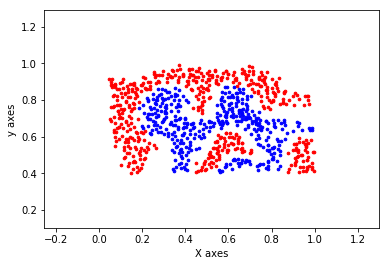

In [360]:
data = sio.loadmat('ex6data2.mat')
X = data['X']
y = data['y']

#plot data
plotDataClassification(X, y)

#Plot the decision function for a 2D SVC
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1])
    y = np.linspace(ylim[0], ylim[1])
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k', alpha=0.5,
               linestyles='-')
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

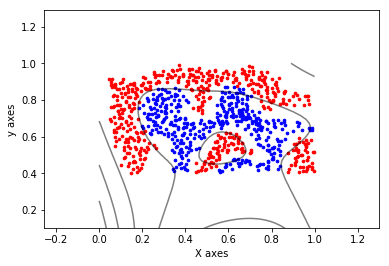

In [361]:
#training

#'rbf' represent Gaussian Kernel
clf = svm.SVC(kernel='rbf', C=100000000)  
clf.fit(X, y.ravel())

#make prediction
y_pred = clf.predict([[0.4, 0.6]])


#plot decision boundary
plot_svc_decision_function(clf)
plotDataClassification(X, y)

### Another test dataset